## Jupyter notebook for plotting RA SNP enrichment and heritability estimates in the ATAC peaks.
This notebook is the code for plotting RA SNP enrichment and heritability estimates in the ATAC peaks identified
throughout the time course as illustrated in the paper **"Analysis of chromatin organinization and gene expression in T cells identifies functional genes for rheumatoid arthritis"** 
by *Jing Yang, Amanda McGovern, Paul Martin, Kate Duffus, Xiangyu Ge, Peyman Zarrineh, Andrew P Morris, Antony Adamson, Peter Fraser, Magnus Rattray & Stephen Eyre*.

Author : *Jing Yang*  <br />
Date: 01/05/2020 <br />
For any questions about the code, please drop me a line at Jing.Yang@manchester.ac.uk

In [2]:
library(tidyverse)
library(data.table)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.0     ✔ purrr   0.3.4
✔ tibble  3.0.1     ✔ dplyr   0.8.5
✔ tidyr   1.1.0     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘data.table’


The following objects are masked from ‘package:dplyr’:

    between, first, last


The following object is masked from ‘package:purrr’:

    transpose




In [3]:
data <- data.frame(fread('data/RA_ATAC_heritability.csv'))

In [4]:
data

Category,Prop._SNPs,Prop._h2,Prop._h2_std_error,Enrichment,Enrichment_std_error,Enrichment_p,Coefficient,Coefficient_std_error,Coefficient_z.score
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
baseL2_0,1.000000000,1.000000000,0.00000000,1.0000000,0.0000000,NA,-1.60e-08,4.19e-08,-0.38131186
Coding_UCSCL2_0,0.014259140,0.066344047,0.04151161,4.6527383,2.9112284,2.112571e-01,5.82e-07,3.87e-07,1.50140276
Coding_UCSC.flanking.500L2_0,0.049362884,0.122890432,0.05391216,2.4895311,1.0921598,1.686967e-01,1.08e-07,1.09e-07,0.98916227
Conserved_LindbladTohL2_0,0.024670538,0.021862108,0.06350145,0.8861626,2.5739791,9.646283e-01,-3.09e-07,3.34e-07,-0.92531156
Conserved_LindbladToh.flanking.500L2_0,0.305531357,0.466254589,0.10251920,1.5260450,0.3355440,1.221461e-01,-3.37e-08,5.32e-08,-0.63430576
CTCF_HoffmanL2_0,0.023814664,0.003411036,0.06067537,0.1432326,2.5478155,7.374208e-01,-2.48e-07,2.21e-07,-1.12088679
CTCF_Hoffman.flanking.500L2_0,0.046979790,0.005075825,0.08059073,0.1080427,1.7154340,5.966223e-01,-8.28e-08,1.45e-07,-0.56986234
DGF_ENCODEL2_0,0.135362603,0.543526971,0.14765863,4.0153407,1.0908377,5.532349e-03,2.33e-07,1.33e-07,1.74807374
DGF_ENCODE.flanking.500L2_0,0.402860920,0.291827376,0.15357992,0.7243874,0.3812232,4.643819e-01,3.66e-08,4.99e-08,0.73405925


In [5]:
dim(data)

[1] 103  10

In [7]:
used_data <- data[98:103,c(3,4,5,6)]

In [8]:
names(used_data) <- c('h2','h2_error','enrichment','enrichment_error')
used_data$label <- c('0 min','1 hrs','20 mins','24 hrs','2 hrs','4 hrs')


In [9]:
used_data

,h2,h2_error,enrichment,enrichment_error,label
,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
98,0.03807368,0.03308994,8.322209,7.232855,0 min
99,0.15845957,0.04061225,18.681328,4.787914,1 hrs
100,0.05999788,0.03294751,13.473606,7.398957,20 mins
101,0.13057403,0.04487890,30.354192,10.432877,24 hrs
102,0.02870167,0.02658273,8.617235,7.981056,2 hrs
103,0.25761935,0.04889998,31.630209,6.003884,4 hrs


In [10]:
data_forplot <- data.frame(x=c(used_data$label, used_data$label), y=c(used_data$h2, used_data$enrichment), 
                           error=c(used_data$h2_error, used_data$enrichment_error),
                          category=rep(c('Heritability','Enrichment'), each=6))
data_forplot$x <- factor(data_forplot$x, levels=c('0 min','20 mins', '1 hrs','2 hrs','4 hrs','24 hrs'))

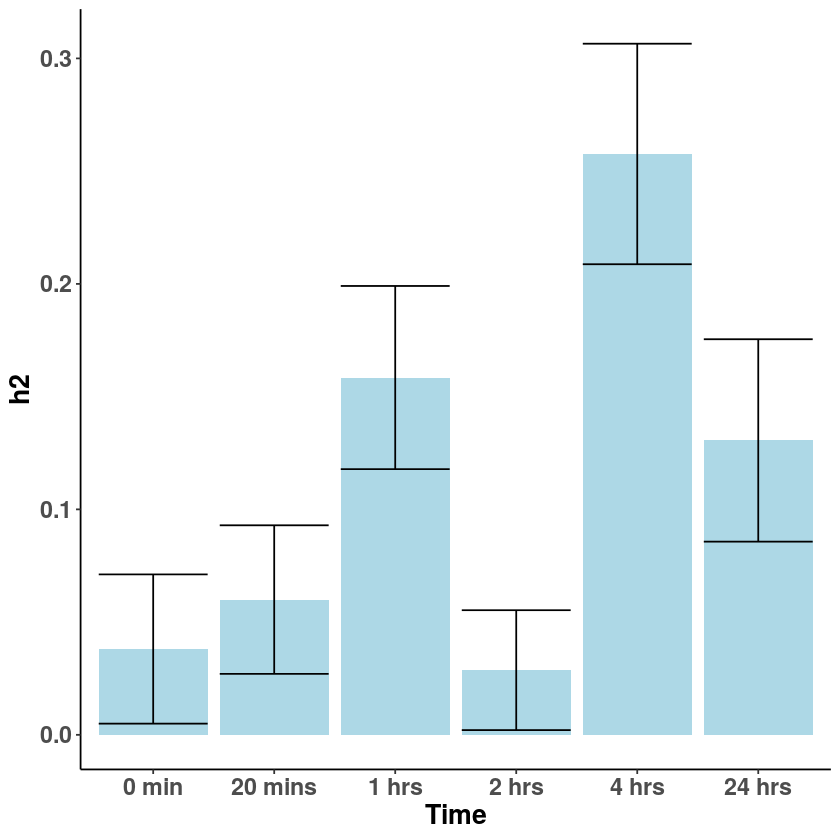

In [11]:
ggplot(data=subset(data_forplot, data_forplot$category %in% 'Heritability'), aes(x=x,y=y)) + geom_col(fill='lightblue') + 
geom_errorbar(aes(ymin= y-error, ymax=y+error)) + xlab('Time') + ylab('h2') +
theme(panel.background=element_blank(),plot.title = element_text(hjust = 0.5, face='bold', size=16),
         axis.title=element_text(size=16,face="bold"), axis.text.x=element_text(size=14, face='bold', hjust=0.5), 
         axis.text.y=element_text(size=14, face='bold'),axis.line=element_line('black'),strip.text.x=element_blank(), strip.text.y=element_blank(), legend.position="none") 


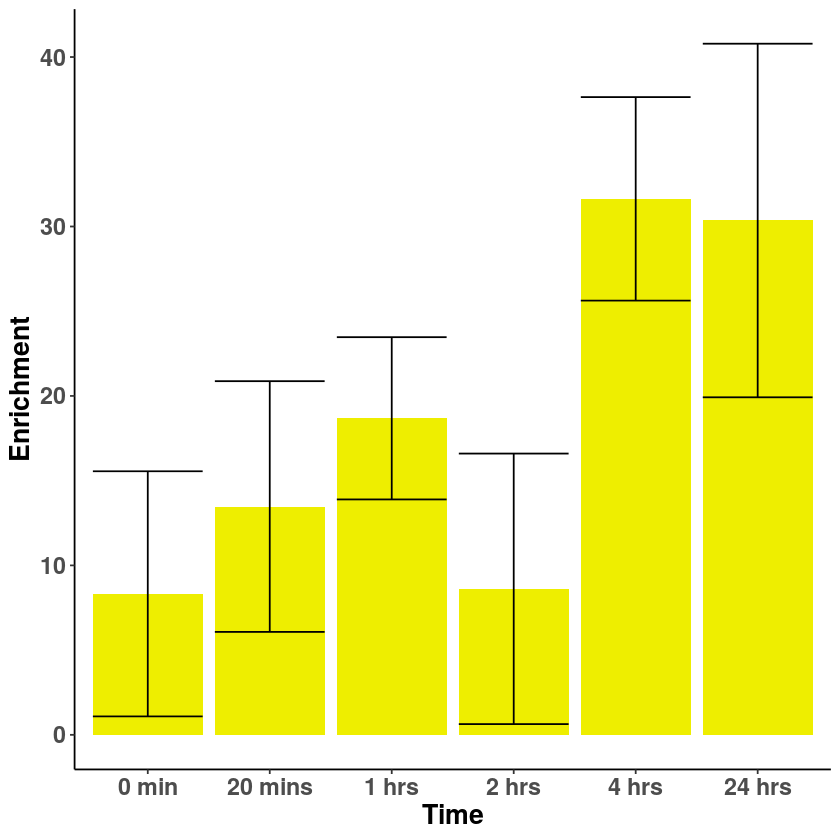

In [12]:
ggplot(data=subset(data_forplot, data_forplot$category %in% 'Enrichment'), aes(x=x,y=y)) + geom_col(fill='yellow2') + 
geom_errorbar(aes(ymin= y-error, ymax=y+error)) + xlab('Time') + ylab('Enrichment') +
theme(panel.background=element_blank(),plot.title = element_text(hjust = 0.5, face='bold', size=16),
         axis.title=element_text(size=16,face="bold"), axis.text.x=element_text(size=14, face='bold', hjust=0.5), 
         axis.text.y=element_text(size=14, face='bold'),axis.line=element_line('black'),strip.text.x=element_blank(), strip.text.y=element_blank(), legend.position="none") 